In [7]:
# Import required libraries
import numpy as np
import folium
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from tqdm import tqdm

Training: 100%|██████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2491.34it/s]


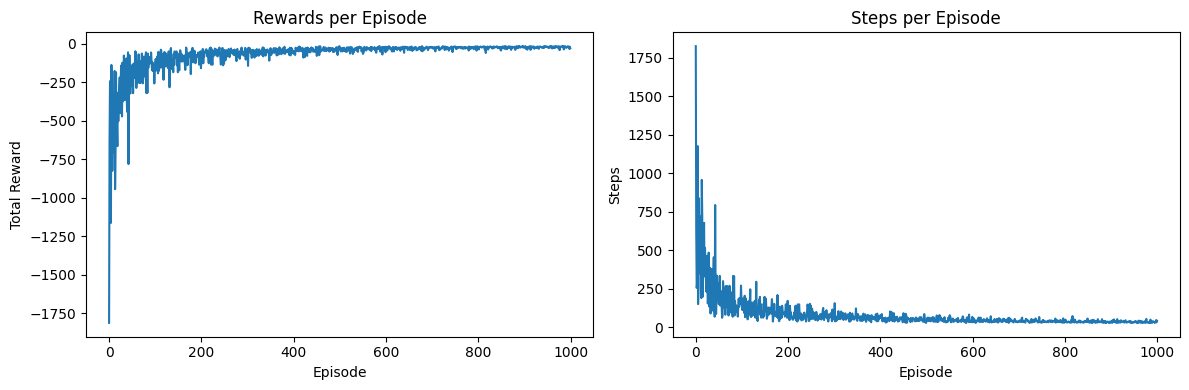

Path length: 101 steps
Path coordinates:
Step 0: (0, 0)
Step 1: (0, 1)
Step 2: (0, 2)
Step 3: (0, 3)
Step 4: (0, 4)
Step 5: (0, 5)
Step 6: (0, 5)
Step 7: (0, 5)
Step 8: (0, 5)
Step 9: (0, 5)
Step 10: (0, 5)
Step 11: (0, 5)
Step 12: (0, 5)
Step 13: (0, 5)
Step 14: (0, 5)
Step 15: (0, 5)
Step 16: (0, 5)
Step 17: (0, 5)
Step 18: (0, 5)
Step 19: (0, 5)
Step 20: (0, 5)
Step 21: (0, 5)
Step 22: (0, 5)
Step 23: (0, 5)
Step 24: (0, 5)
Step 25: (0, 5)
Step 26: (0, 5)
Step 27: (0, 5)
Step 28: (0, 5)
Step 29: (0, 5)
Step 30: (0, 5)
Step 31: (0, 5)
Step 32: (0, 5)
Step 33: (0, 5)
Step 34: (0, 5)
Step 35: (0, 5)
Step 36: (0, 5)
Step 37: (0, 5)
Step 38: (0, 5)
Step 39: (0, 5)
Step 40: (0, 5)
Step 41: (0, 5)
Step 42: (0, 5)
Step 43: (0, 5)
Step 44: (0, 5)
Step 45: (0, 5)
Step 46: (0, 5)
Step 47: (0, 5)
Step 48: (0, 5)
Step 49: (0, 5)
Step 50: (0, 5)
Step 51: (0, 5)
Step 52: (0, 5)
Step 53: (0, 5)
Step 54: (0, 5)
Step 55: (0, 5)
Step 56: (0, 5)
Step 57: (0, 5)
Step 58: (0, 5)
Step 59: (0, 5)
Step 60: 

Map saved to 'navigation_path.html'


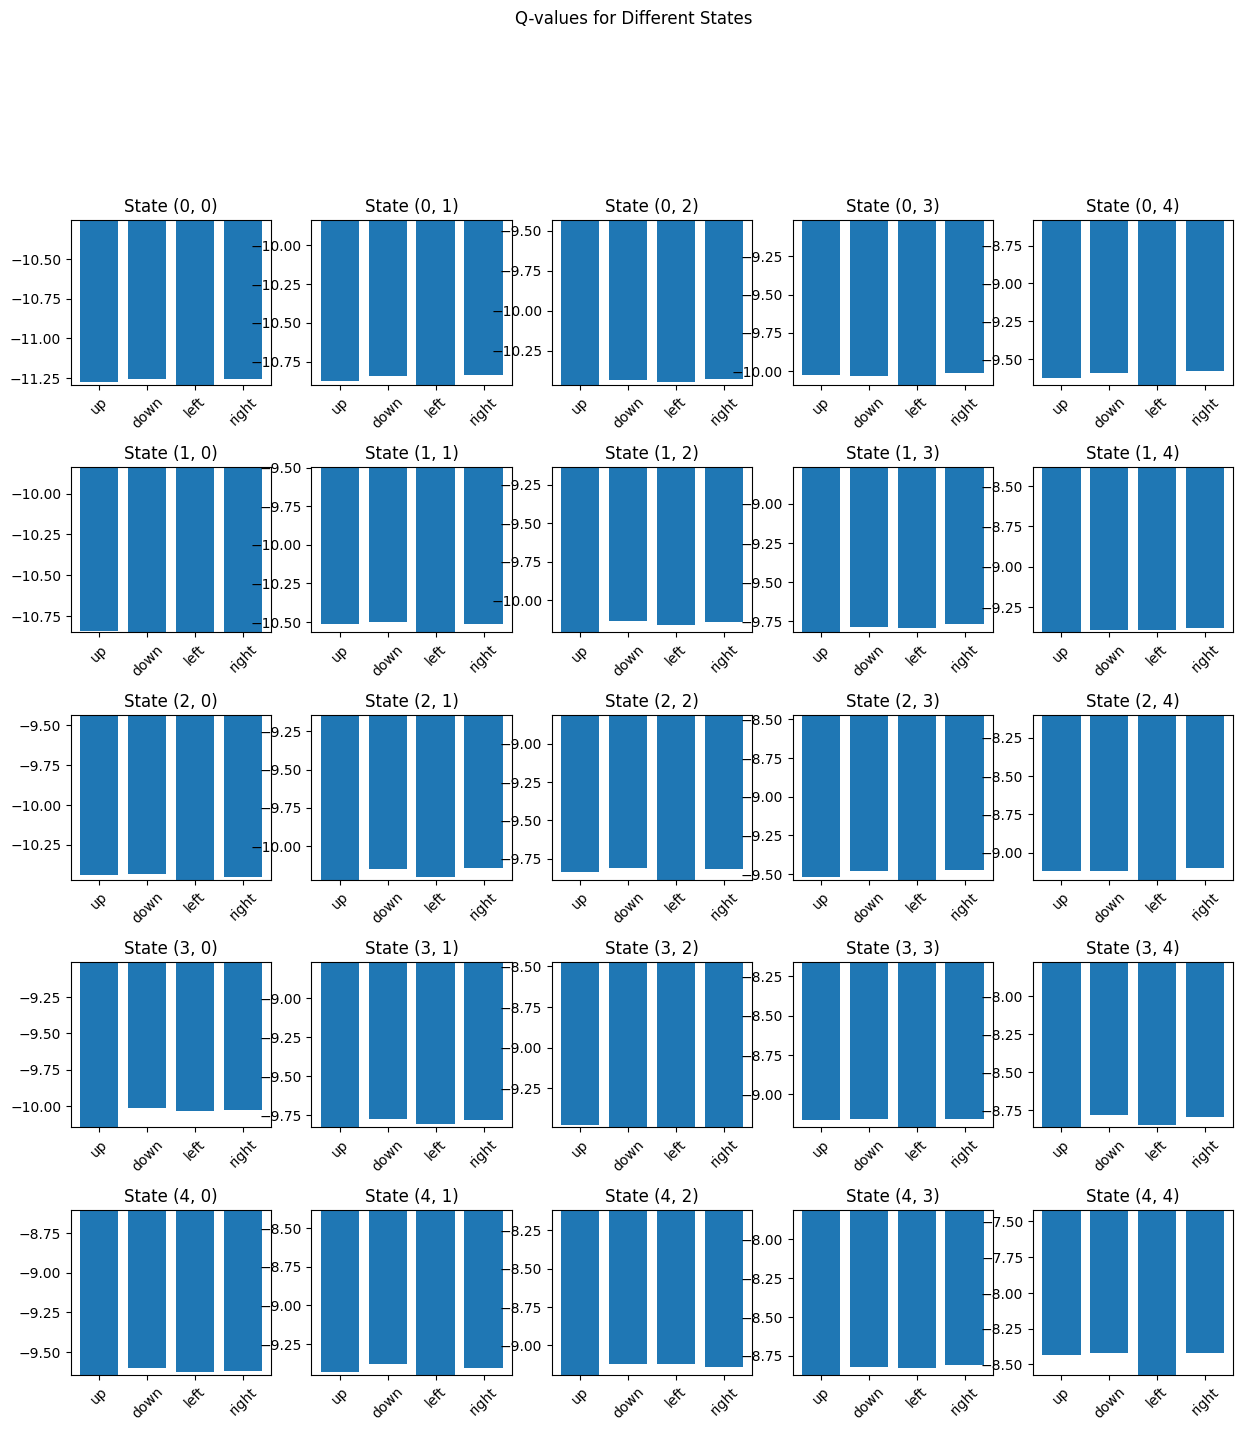

In [8]:
# %%
class GridWorld:
    def __init__(self, size=10, start=(0, 0), goal=(9, 9)):
        """Initialize the grid world environment"""
        self.size = size
        self.start = start
        self.goal = goal
        self.current_state = start
        self.actions = ['up', 'down', 'left', 'right']
        
    def reset(self):
        """Reset the environment to starting position"""
        self.current_state = self.start
        return self.current_state
    
    def step(self, action):
        """Take an action and return (next_state, reward, done)"""
        x, y = self.current_state
        
        # Calculate new position based on action
        if action == 'up' and x > 0:
            x -= 1
        elif action == 'down' and x < self.size - 1:
            x += 1
        elif action == 'left' and y > 0:
            y -= 1
        elif action == 'right' and y < self.size - 1:
            y += 1
            
        self.current_state = (x, y)
        
        # Check if goal reached
        if self.current_state == self.goal:
            reward = 10
            done = True
        else:
            reward = -1  # Small penalty for each step to encourage efficiency
            done = False
            
        return self.current_state, reward, done

# %% [markdown]
# ## 2. Q-Learning Agent Implementation
# 
# Now let's implement our Q-learning agent based on the algorithms from the textbook.

# %%
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.9, 
                 exploration_rate=1.0, exploration_decay=0.995, min_epsilon=0.01):
        """Initialize the Q-learning agent"""
        self.env = env
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = exploration_rate
        self.epsilon_decay = exploration_decay
        self.min_epsilon = min_epsilon
        self.q_table = {}
        
        # Initialize Q-table
        for x in range(env.size):
            for y in range(env.size):
                self.q_table[(x, y)] = {a: 0 for a in env.actions}
    
    def choose_action(self, state):
        """Epsilon-greedy action selection"""
        if np.random.random() < self.epsilon:
            return np.random.choice(self.env.actions)
        else:
            return max(self.q_table[state].items(), key=lambda x: x[1])[0]
    
    def learn(self, state, action, reward, next_state):
        """Update Q-values using the Q-learning update rule"""
        best_next_action = max(self.q_table[next_state].items(), key=lambda x: x[1])[0]
        td_target = reward + self.gamma * self.q_table[next_state][best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.lr * td_error
        
        # Decay exploration rate, but don't go below minimum
        self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

# %% [markdown]
# ## 3. Training Function
# 
# Let's create a function to train our agent.

# %%
def train_agent(env, agent, episodes=1000):
    """Train the agent through multiple episodes"""
    rewards = []
    episode_lengths = []
    
    for episode in tqdm(range(episodes), desc="Training"):
        state = env.reset()
        total_reward = 0
        done = False
        steps = 0
        
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            agent.learn(state, action, reward, next_state)
            state = next_state
            total_reward += reward
            steps += 1
            
        rewards.append(total_reward)
        episode_lengths.append(steps)
        
    return rewards, episode_lengths

# %% [markdown]
# ## 4. Visualization Functions
# 
# Now let's create functions to visualize our results.

# %%
def plot_training(rewards, episode_lengths):
    """Plot training progress"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot rewards
    ax1.plot(rewards)
    ax1.set_title('Rewards per Episode')
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Total Reward')
    
    # Plot episode lengths
    ax2.plot(episode_lengths)
    ax2.set_title('Steps per Episode')
    ax2.set_xlabel('Episode')
    ax2.set_ylabel('Steps')
    
    plt.tight_layout()
    plt.show()

def visualize_path(env, path, zoom_start=6):
    """Visualize the path on a folium map"""
    # Convert grid coordinates to lat/lng (simple linear mapping)
    def grid_to_latlon(x, y, size=env.size):
        lat = 37.7749 - (x/size * 0.2)  # Adjust for SF area
        lon = -122.4194 + (y/size * 0.2)
        return (lat, lon)
    
    # Create map centered on start point
    start_latlon = grid_to_latlon(*env.start)
    m = folium.Map(location=start_latlon, zoom_start=zoom_start)
    
    # Add markers for start and goal
    folium.Marker(
        grid_to_latlon(*env.start),
        popup="Start",
        icon=folium.Icon(color="green")
    ).add_to(m)
    
    folium.Marker(
        grid_to_latlon(*env.goal),
        popup="Goal",
        icon=folium.Icon(color="red")
    ).add_to(m)
    
    # Add path as a line
    path_coords = [grid_to_latlon(*p) for p in path]
    folium.PolyLine(path_coords, color="blue", weight=2.5, opacity=1).add_to(m)
    
    # Add markers for each step
    for i, point in enumerate(path):
        folium.CircleMarker(
            location=grid_to_latlon(*point),
            radius=3,
            color='orange' if i not in [0, len(path)-1] else None,
            fill=True,
            fill_color='orange',
            popup=f"Step {i}"
        ).add_to(m)
    
    return m

# %% [markdown]
# ## 5. Main Execution
# 
# Now let's put everything together and run our experiment.

# %%
# Create environment and agent
env = GridWorld(size=15, start=(0, 0), goal=(14, 14))
agent = QLearningAgent(env, learning_rate=0.1, discount_factor=0.95, 
                      exploration_rate=1.0, exploration_decay=0.997, min_epsilon=0.01)

# Train the agent
rewards, episode_lengths = train_agent(env, agent, episodes=1000)

# Plot training progress
plot_training(rewards, episode_lengths)

# %% [markdown]
# ## 6. Test the Trained Agent
# 
# Let's see how our trained agent performs.

# %%
def test_agent(env, agent, max_steps=100):
    """Test the trained agent"""
    state = env.reset()
    done = False
    path = [state]
    
    for _ in range(max_steps):
        action = agent.choose_action(state)
        state, _, done = env.step(action)
        path.append(state)
        
        if done:
            break
    
    return path

# Test the agent
test_path = test_agent(env, agent)

print(f"Path length: {len(test_path)} steps")
print("Path coordinates:")
for i, point in enumerate(test_path):
    print(f"Step {i}: {point}")

# Visualize the path
map = visualize_path(env, test_path, zoom_start=12)
display(map)

# %% [markdown]
# ## 7. Save the Map to HTML
# 
# Optionally save the map to an HTML file.

# %%
# Save the map to an HTML file
map.save('navigation_path.html')
print("Map saved to 'navigation_path.html'")

# Display link to the file
display(HTML('<a href="navigation_path.html" target="_blank">Open Map in New Tab</a>'))

# %% [markdown]
# ## 8. Q-Table Visualization (Optional)
# 
# Let's visualize part of the Q-table to see what the agent has learned.

# %%
def visualize_q_table(q_table, size=5):
    """Visualize a portion of the Q-table"""
    fig, axs = plt.subplots(size, size, figsize=(15, 15))
    plt.subplots_adjust(hspace=0.5)
    
    for x in range(size):
        for y in range(size):
            state = (x, y)
            actions = q_table[state]
            
            ax = axs[x, y]
            ax.bar(actions.keys(), actions.values())
            ax.set_title(f'State {state}')
            ax.set_ylim([min(0, min(actions.values())), max(actions.values())+1])
            ax.tick_params(axis='x', rotation=45)
    
    plt.suptitle('Q-values for Different States', y=1.02)
    plt.show()

# Visualize first 5x5 states
visualize_q_table(agent.q_table, size=5)

Episode 0, Success Streak: 1/10
Current Epsilon: 0.6547
Last Episode Reward: -836, Steps: 847


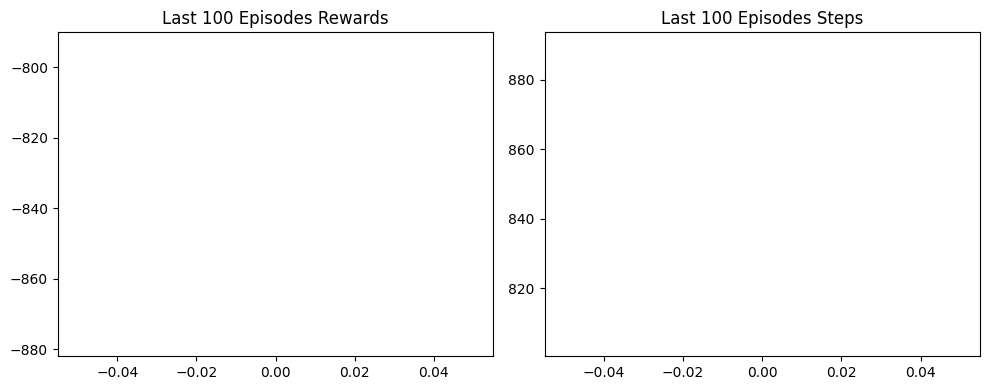

Training Progress: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 24.56it/s]


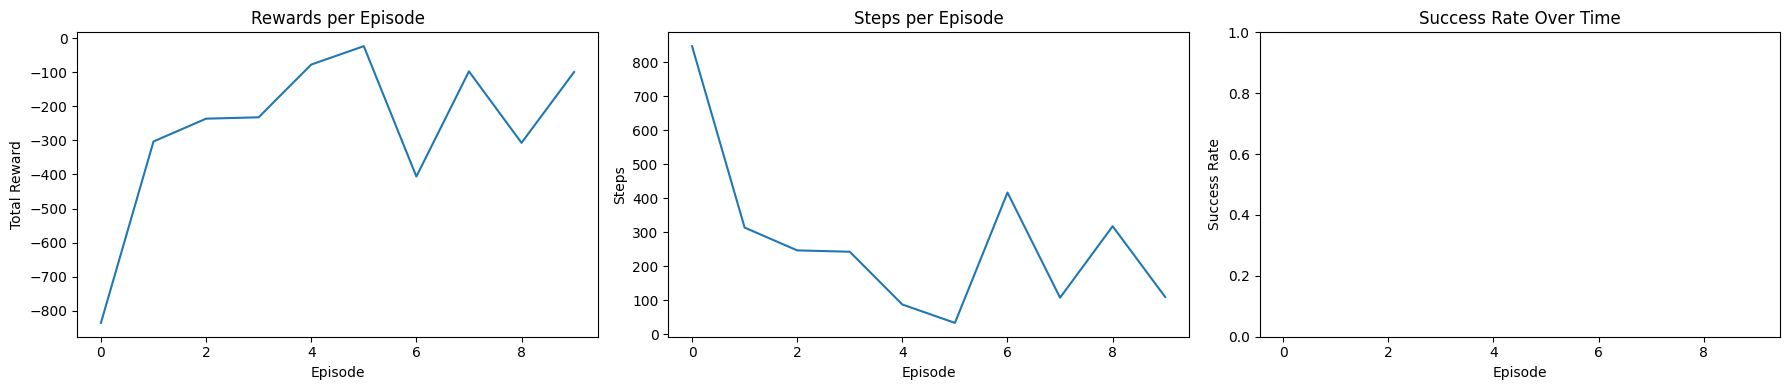

Agent failed to reach the goal within the maximum steps


Map saved to 'optimal_navigation_path.html'


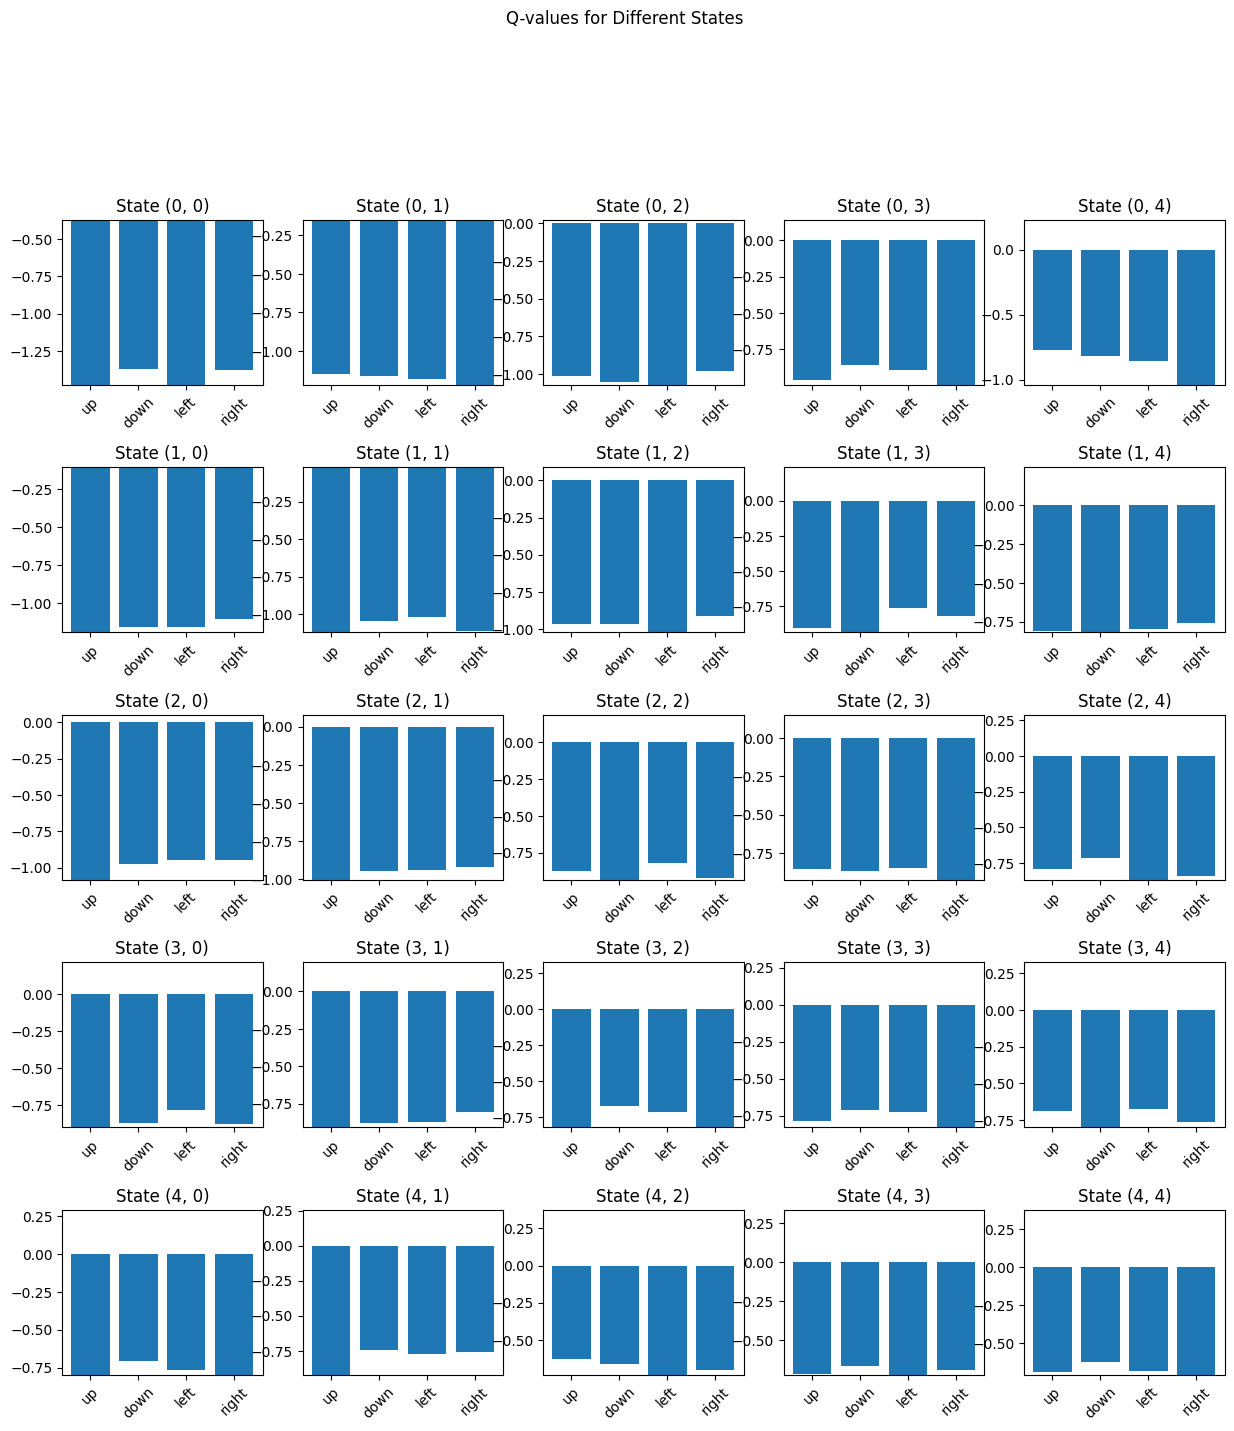

In [9]:
# %% [markdown]
# # Reinforcement Learning Navigation on Folium Map
# 
# This notebook implements a Q-learning agent that learns to navigate from a start point to a goal on a grid world, with continuous training until perfect performance is achieved.

# %%
# Import required libraries
import numpy as np
import folium
from IPython.display import display, HTML, clear_output
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

# %% [markdown]
# ## 1. Environment Setup
# 
# First, we'll create our grid world environment that the agent will navigate.

# %%
class GridWorld:
    def __init__(self, size=10, start=(0, 0), goal=(9, 9)):
        """Initialize the grid world environment"""
        self.size = size
        self.start = start
        self.goal = goal
        self.current_state = start
        self.actions = ['up', 'down', 'left', 'right']
        
    def reset(self):
        """Reset the environment to starting position"""
        self.current_state = self.start
        return self.current_state
    
    def step(self, action):
        """Take an action and return (next_state, reward, done)"""
        x, y = self.current_state
        
        # Calculate new position based on action
        if action == 'up' and x > 0:
            x -= 1
        elif action == 'down' and x < self.size - 1:
            x += 1
        elif action == 'left' and y > 0:
            y -= 1
        elif action == 'right' and y < self.size - 1:
            y += 1
            
        self.current_state = (x, y)
        
        # Check if goal reached
        if self.current_state == self.goal:
            reward = 10
            done = True
        else:
            reward = -1  # Small penalty for each step to encourage efficiency
            done = False
            
        return self.current_state, reward, done

# %% [markdown]
# ## 2. Q-Learning Agent Implementation
# 
# Now let's implement our Q-learning agent with enhanced training capabilities.

# %%
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.9, 
                 exploration_rate=1.0, exploration_decay=0.999, min_epsilon=0.01):
        """Initialize the Q-learning agent"""
        self.env = env
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = exploration_rate
        self.epsilon_decay = exploration_decay
        self.min_epsilon = min_epsilon
        self.q_table = {}
        
        # Initialize Q-table
        for x in range(env.size):
            for y in range(env.size):
                self.q_table[(x, y)] = {a: 0 for a in env.actions}
    
    def choose_action(self, state):
        """Epsilon-greedy action selection"""
        if np.random.random() < self.epsilon:
            return np.random.choice(self.env.actions)
        else:
            return max(self.q_table[state].items(), key=lambda x: x[1])[0]
    
    def learn(self, state, action, reward, next_state):
        """Update Q-values using the Q-learning update rule"""
        best_next_action = max(self.q_table[next_state].items(), key=lambda x: x[1])[0]
        td_target = reward + self.gamma * self.q_table[next_state][best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.lr * td_error
        
        # Decay exploration rate, but don't go below minimum
        self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)
    
    def get_optimal_path(self, max_steps=100):
        """Get the optimal path using current Q-table (greedy policy)"""
        state = self.env.reset()
        path = [state]
        
        for _ in range(max_steps):
            action = max(self.q_table[state].items(), key=lambda x: x[1])[0]
            state, _, done = self.env.step(action)
            path.append(state)
            
            if done:
                break
                
        return path, done

# %% [markdown]
# ## 3. Continuous Training Function
# 
# Modified training function that continues until perfect performance is achieved.

# %%
def train_until_perfect(env, agent, consecutive_successes=10, max_episodes=10000, progress_update=100):
    """Train the agent until it consistently reaches the goal"""
    rewards = []
    episode_lengths = []
    success_count = 0
    success_history = []
    
    with tqdm(total=consecutive_successes, desc="Training Progress") as pbar:
        episode = 0
        while success_count < consecutive_successes and episode < max_episodes:
            state = env.reset()
            total_reward = 0
            done = False
            steps = 0
            
            while not done:
                action = agent.choose_action(state)
                next_state, reward, done = env.step(action)
                agent.learn(state, action, reward, next_state)
                state = next_state
                total_reward += reward
                steps += 1
                
            rewards.append(total_reward)
            episode_lengths.append(steps)
            
            # Check if goal was reached
            if done and state == env.goal:
                success_count += 1
                success_history.append(1)
            else:
                success_count = 0
                success_history.append(0)
            
            # Update progress bar
            if success_count > pbar.n:
                pbar.update(success_count - pbar.n)
            
            # Periodically show progress
            if episode % progress_update == 0:
                clear_output(wait=True)
                print(f"Episode {episode}, Success Streak: {success_count}/{consecutive_successes}")
                print(f"Current Epsilon: {agent.epsilon:.4f}")
                print(f"Last Episode Reward: {total_reward}, Steps: {steps}")
                
                # Show recent performance
                plt.figure(figsize=(10, 4))
                plt.subplot(1, 2, 1)
                plt.plot(rewards[-100:])
                plt.title('Last 100 Episodes Rewards')
                
                plt.subplot(1, 2, 2)
                plt.plot(episode_lengths[-100:])
                plt.title('Last 100 Episodes Steps')
                plt.tight_layout()
                plt.show()
                
            episode += 1
    
    return rewards, episode_lengths, success_history

# %% [markdown]
# ## 4. Visualization Functions
# 
# Functions to visualize our results.

# %%
def plot_training(rewards, episode_lengths, success_history):
    """Plot training progress"""
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    
    # Plot rewards
    ax1.plot(rewards)
    ax1.set_title('Rewards per Episode')
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Total Reward')
    
    # Plot episode lengths
    ax2.plot(episode_lengths)
    ax2.set_title('Steps per Episode')
    ax2.set_xlabel('Episode')
    ax2.set_ylabel('Steps')
    
    # Plot success rate
    ax3.plot(np.cumsum(success_history) / (np.arange(len(success_history)) + 1))
    ax3.set_title('Success Rate Over Time')
    ax3.set_xlabel('Episode')
    ax3.set_ylabel('Success Rate')
    ax3.set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

def visualize_path(env, path, zoom_start=6):
    """Visualize the path on a folium map"""
    # Convert grid coordinates to lat/lng (simple linear mapping)
    def grid_to_latlon(x, y, size=env.size):
        lat = 37.7749 - (x/size * 0.2)  # Adjust for SF area
        lon = -122.4194 + (y/size * 0.2)
        return (lat, lon)
    
    # Create map centered on start point
    start_latlon = grid_to_latlon(*env.start)
    m = folium.Map(location=start_latlon, zoom_start=zoom_start)
    
    # Add markers for start and goal
    folium.Marker(
        grid_to_latlon(*env.start),
        popup="Start",
        icon=folium.Icon(color="green")
    ).add_to(m)
    
    folium.Marker(
        grid_to_latlon(*env.goal),
        popup="Goal",
        icon=folium.Icon(color="red")
    ).add_to(m)
    
    # Add path as a line
    path_coords = [grid_to_latlon(*p) for p in path]
    folium.PolyLine(path_coords, color="blue", weight=2.5, opacity=1).add_to(m)
    
    # Add markers for each step
    for i, point in enumerate(path):
        folium.CircleMarker(
            location=grid_to_latlon(*point),
            radius=3,
            color='orange' if i not in [0, len(path)-1] else None,
            fill=True,
            fill_color='orange',
            popup=f"Step {i}"
        ).add_to(m)
    
    return m

# %% [markdown]
# ## 5. Main Execution
# 
# Now let's put everything together and run our continuous training.

# %%
# Create environment and agent
env = GridWorld(size=10, start=(0, 0), goal=(9, 9))
agent = QLearningAgent(env, learning_rate=0.1, discount_factor=0.95, 
                      exploration_rate=1.0, exploration_decay=0.9995, min_epsilon=0.01)

# Train the agent until it reaches 10 consecutive successes
rewards, episode_lengths, success_history = train_until_perfect(env, agent, consecutive_successes=10)

# Plot final training progress
plot_training(rewards, episode_lengths, success_history)

# %% [markdown]
# ## 6. Test the Trained Agent
# 
# Let's see how our trained agent performs.

# %%
# Get the optimal path using learned Q-values
optimal_path, success = agent.get_optimal_path()

if success:
    print("Agent successfully reached the goal!")
    print(f"Path length: {len(optimal_path)} steps")
    print("Path coordinates:")
    for i, point in enumerate(optimal_path):
        print(f"Step {i}: {point}")
else:
    print("Agent failed to reach the goal within the maximum steps")

# Visualize the path
map = visualize_path(env, optimal_path, zoom_start=12)
display(map)

# %% [markdown]
# ## 7. Save the Map to HTML
# 
# Optionally save the map to an HTML file.

# %%
# Save the map to an HTML file
map.save('optimal_navigation_path.html')
print("Map saved to 'optimal_navigation_path.html'")

# Display link to the file
display(HTML('<a href="optimal_navigation_path.html" target="_blank">Open Optimal Path in New Tab</a>'))

# %% [markdown]
# ## 8. Q-Table Visualization (Optional)
# 
# Let's visualize part of the Q-table to see what the agent has learned.

# %%
def visualize_q_table(q_table, size=5):
    """Visualize a portion of the Q-table"""
    fig, axs = plt.subplots(size, size, figsize=(15, 15))
    plt.subplots_adjust(hspace=0.5)
    
    for x in range(size):
        for y in range(size):
            state = (x, y)
            actions = q_table[state]
            
            ax = axs[x, y]
            ax.bar(actions.keys(), actions.values())
            ax.set_title(f'State {state}')
            ax.set_ylim([min(0, min(actions.values())), max(actions.values())+1])
            ax.tick_params(axis='x', rotation=45)
    
    plt.suptitle('Q-values for Different States', y=1.02)
    plt.show()

# Visualize first 5x5 states
visualize_q_table(agent.q_table, size=5)

Episode 700
Current ε: 0.0151
Recent success rate: 14.0%
Overall success rate: 2.3%
Best path length: 18 steps
Current consecutive successes: 0/10


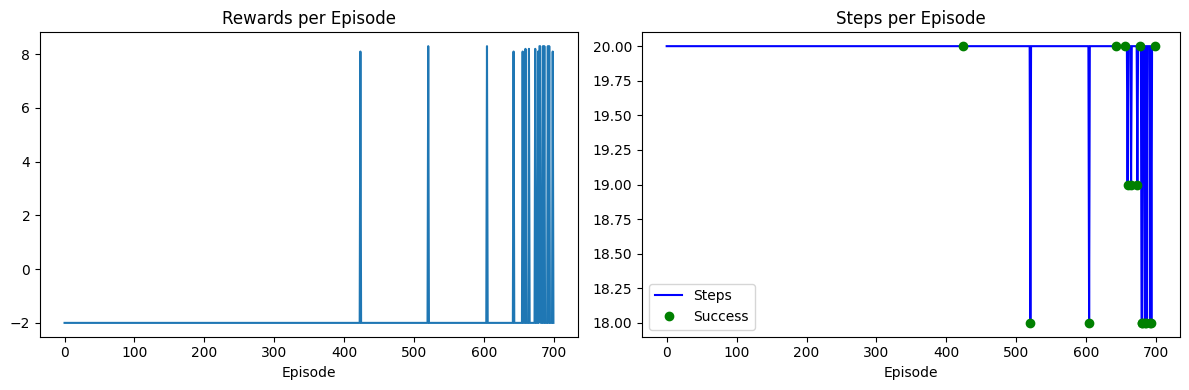

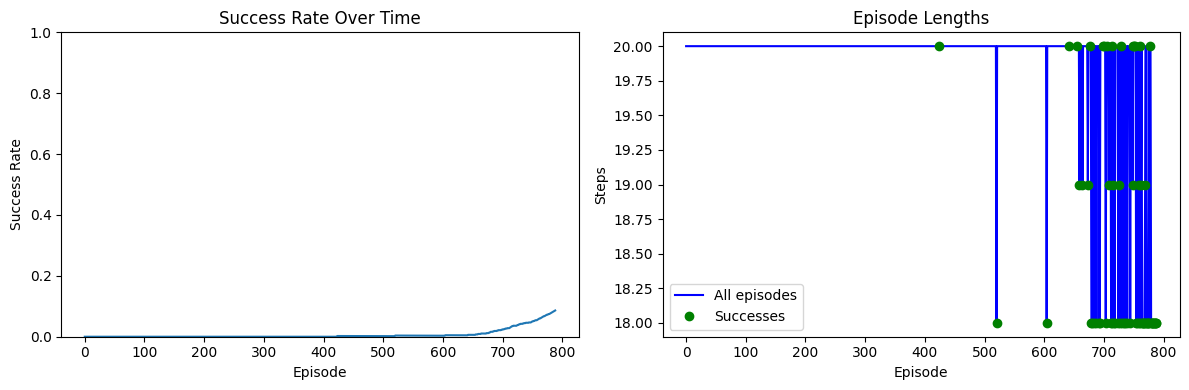


Optimal path found with 19 steps:
Step 0: (0, 0)
Step 1: (0, 1)
Step 2: (1, 1)
Step 3: (2, 1)
Step 4: (3, 1)
Step 5: (3, 2)
Step 6: (4, 2)
Step 7: (5, 2)
Step 8: (5, 3)
Step 9: (6, 3)
Step 10: (6, 4)
Step 11: (6, 5)
Step 12: (6, 6)
Step 13: (6, 7)
Step 14: (6, 8)
Step 15: (7, 8)
Step 16: (8, 8)
Step 17: (8, 9)
Step 18: (9, 9)


In [12]:
# %% [markdown]
# # Fixed Continuous RL Training for Navigation
# 
# This version properly implements continuous training until the agent reliably reaches its destination.

# %%
# Import required libraries
import numpy as np
import folium
from IPython.display import display, HTML, clear_output
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time

# %% [markdown]
# ## 1. Fixed Environment Implementation

# %%
class GridWorld:
    def __init__(self, size=10, start=(0, 0), goal=(9, 9)):
        """Initialize the grid world environment"""
        self.size = size
        self.start = start
        self.goal = goal
        self.current_state = start
        self.actions = ['up', 'down', 'left', 'right']
        
    def reset(self):
        """Reset the environment to starting position"""
        self.current_state = self.start
        return self.current_state
    
    def step(self, action):
        """Take an action and return (next_state, reward, done)"""
        x, y = self.current_state
        
        # Calculate new position based on action
        if action == 'up':
            x = max(0, x-1)
        elif action == 'down':
            x = min(self.size-1, x+1)
        elif action == 'left':
            y = max(0, y-1)
        elif action == 'right':
            y = min(self.size-1, y+1)
            
        self.current_state = (x, y)
        
        # Check if goal reached
        if self.current_state == self.goal:
            reward = 10
            done = True
        else:
            reward = -0.1  # Small penalty for each step to encourage efficiency
            done = False
            
        return self.current_state, reward, done

# %% [markdown]
# ## 2. Fixed Q-Learning Agent

# %%
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.95, 
                 exploration_rate=1.0, exploration_decay=0.9995, min_epsilon=0.01):
        """Initialize the Q-learning agent"""
        self.env = env
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = exploration_rate
        self.epsilon_decay = exploration_decay
        self.min_epsilon = min_epsilon
        self.q_table = {}
        
        # Initialize Q-table with small random values
        for x in range(env.size):
            for y in range(env.size):
                self.q_table[(x, y)] = {a: np.random.uniform(-0.1, 0.1) for a in env.actions}
    
    def choose_action(self, state):
        """Epsilon-greedy action selection"""
        if np.random.random() < self.epsilon:
            return np.random.choice(self.env.actions)
        else:
            return max(self.q_table[state].items(), key=lambda x: x[1])[0]
    
    def learn(self, state, action, reward, next_state):
        """Update Q-values using the Q-learning update rule"""
        best_next_action = max(self.q_table[next_state].items(), key=lambda x: x[1])[0]
        td_target = reward + self.gamma * self.q_table[next_state][best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.lr * td_error
        
        # Decay exploration rate, but don't go below minimum
        self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)
    
    def get_optimal_path(self):
        """Get the optimal path using current Q-table (greedy policy)"""
        state = self.env.reset()
        path = [state]
        visited = set()
        done = False
        
        while not done and len(path) < self.env.size * 2:  # Prevent infinite loops
            action = max(self.q_table[state].items(), key=lambda x: x[1])[0]
            state, _, done = self.env.step(action)
            
            # Check for loops
            if state in visited:
                break
            visited.add(state)
            
            path.append(state)
            
        return path, done

# %% [markdown]
# ## 3. Fixed Continuous Training Function

# %%
def train_until_perfect(env, agent, consecutive_successes=10, max_episodes=10000, update_interval=100):
    """Train the agent until it consistently reaches the goal"""
    rewards = []
    episode_lengths = []
    success_history = []
    success_count = 0
    best_path_length = float('inf')
    
    # Create progress bar
    pbar = tqdm(total=consecutive_successes, desc="Consecutive successes")
    
    for episode in range(1, max_episodes + 1):
        state = env.reset()
        total_reward = 0
        done = False
        steps = 0
        
        while not done and steps < env.size * 2:  # Prevent infinite episodes
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            agent.learn(state, action, reward, next_state)
            state = next_state
            total_reward += reward
            steps += 1
        
        # Record episode results
        reached_goal = done and state == env.goal
        rewards.append(total_reward)
        episode_lengths.append(steps)
        success_history.append(1 if reached_goal else 0)
        
        # Update success count
        if reached_goal:
            success_count += 1
            if steps < best_path_length:
                best_path_length = steps
        else:
            success_count = 0
        
        # Update progress bar
        if reached_goal and success_count <= consecutive_successes:
            pbar.update(1)
        
        # Early stopping if we've achieved the target
        if success_count >= consecutive_successes:
            break
            
        # Show progress periodically
        if episode % update_interval == 0:
            clear_output(wait=True)
            display(pbar)
            
            # Calculate success rate
            recent_success_rate = np.mean(success_history[-update_interval:])
            overall_success_rate = np.mean(success_history)
            
            print(f"Episode {episode}")
            print(f"Current ε: {agent.epsilon:.4f}")
            print(f"Recent success rate: {recent_success_rate:.1%}")
            print(f"Overall success rate: {overall_success_rate:.1%}")
            print(f"Best path length: {best_path_length} steps")
            print(f"Current consecutive successes: {success_count}/{consecutive_successes}")
            
            # Plot training progress
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
            
            # Plot rewards
            ax1.plot(rewards)
            ax1.set_title('Rewards per Episode')
            ax1.set_xlabel('Episode')
            
            # Plot episode lengths with success markers
            ax2.plot(episode_lengths, 'b', label='Steps')
            ax2.plot(np.where(success_history)[0], 
                    np.array(episode_lengths)[np.where(success_history)[0]], 
                    'go', label='Success')
            ax2.set_title('Steps per Episode')
            ax2.set_xlabel('Episode')
            ax2.legend()
            
            plt.tight_layout()
            plt.show()
    
    pbar.close()
    return rewards, episode_lengths, success_history

# %% [markdown]
# ## 4. Run the Fixed Training

# %%
# Create environment and agent
env = GridWorld(size=10, start=(0, 0), goal=(9, 9))
agent = QLearningAgent(env, learning_rate=0.2, discount_factor=0.95, 
                      exploration_rate=1.0, exploration_decay=0.9997, min_epsilon=0.01)

# Train the agent until it reaches 10 consecutive successes
rewards, episode_lengths, success_history = train_until_perfect(
    env, agent, consecutive_successes=10, max_episodes=10000)

# %% [markdown]
# ## 5. Display Final Results

# %%
# Plot final training progress
plt.figure(figsize=(12, 4))

# Plot success rate over time
plt.subplot(1, 2, 1)
success_rate = np.cumsum(success_history) / (np.arange(len(success_history)) + 1)
plt.plot(success_rate)
plt.title('Success Rate Over Time')
plt.xlabel('Episode')
plt.ylabel('Success Rate')
plt.ylim(0, 1)

# Plot episode lengths with successes highlighted
plt.subplot(1, 2, 2)
plt.plot(episode_lengths, 'b', label='All episodes')
success_indices = np.where(success_history)[0]
plt.plot(success_indices, np.array(episode_lengths)[success_indices], 'go', label='Successes')
plt.title('Episode Lengths')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.legend()

plt.tight_layout()
plt.show()

# Get and display the optimal path
optimal_path, success = agent.get_optimal_path()
if success:
    print(f"\nOptimal path found with {len(optimal_path)} steps:")
    for i, point in enumerate(optimal_path):
        print(f"Step {i}: {point}")
else:
    print("\nAgent failed to find optimal path (likely stuck in a loop)")

# Visualize the path
if success:
    map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)
    
    # Convert grid coordinates to lat/lng
    def grid_to_latlon(x, y):
        lat = 37.7749 - (x/10 * 0.2)
        lon = -122.4194 + (y/10 * 0.2)
        return (lat, lon)
    
    # Add path
    path_coords = [grid_to_latlon(*p) for p in optimal_path]
    folium.PolyLine(path_coords, color="blue", weight=2.5, opacity=1).add_to(map)
    
    # Add markers
    folium.Marker(
        grid_to_latlon(*env.start),
        popup="Start",
        icon=folium.Icon(color="green")
    ).add_to(map)
    
    folium.Marker(
        grid_to_latlon(*env.goal),
        popup="Goal",
        icon=folium.Icon(color="red")
    ).add_to(map)
    
    # Add step markers
    for i, point in enumerate(optimal_path[1:-1]):
        folium.CircleMarker(
            location=grid_to_latlon(*point),
            radius=3,
            color='orange',
            fill=True,
            popup=f"Step {i+1}"
        ).add_to(map)
    
    display(map)
    
    # Save the map
    map.save('optimal_path.html')
    display(HTML('<a href="optimal_path.html" target="_blank">Open Optimal Path in New Tab</a>'))

Episode 700
Current ε: 0.0151
Recent success rate: 24.0%
Overall success rate: 4.0%
Best path length: 18 steps
Current consecutive successes: 0/10


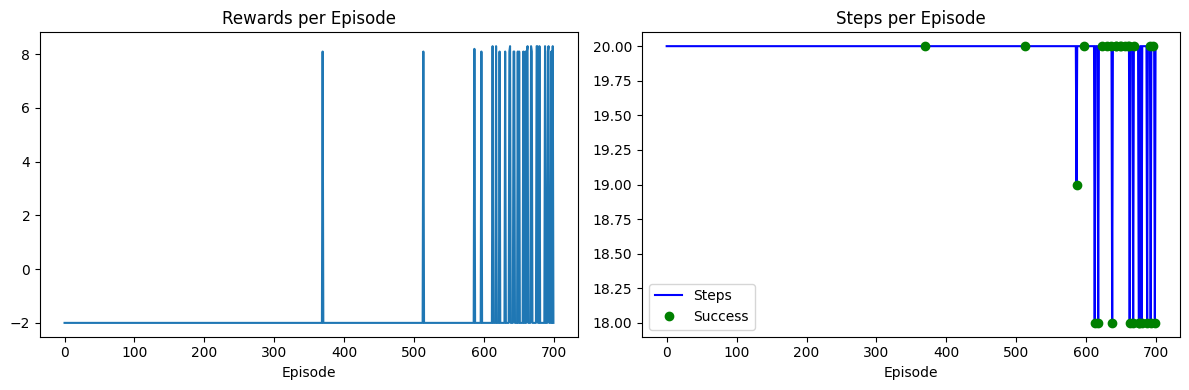

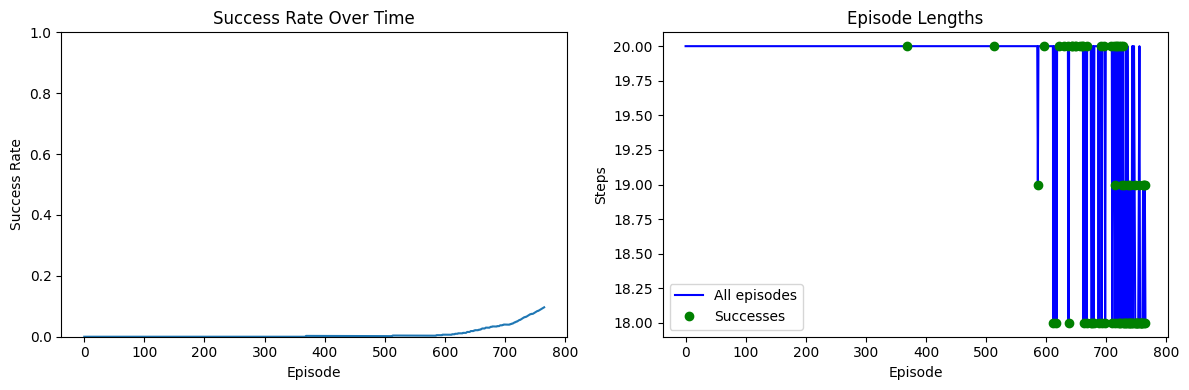


Optimal path found with 19 steps:
Step 0: (0, 0)
Step 1: (1, 0)
Step 2: (2, 0)
Step 3: (3, 0)
Step 4: (3, 1)
Step 5: (3, 2)
Step 6: (4, 2)
Step 7: (4, 3)
Step 8: (4, 4)
Step 9: (4, 5)
Step 10: (5, 5)
Step 11: (6, 5)
Step 12: (6, 6)
Step 13: (7, 6)
Step 14: (7, 7)
Step 15: (7, 8)
Step 16: (8, 8)
Step 17: (9, 8)
Step 18: (9, 9)


In [16]:
# %% [markdown]
# # Fixed Continuous RL Training for Navigation

# This version properly implements continuous training until the agent reliably reaches its destination.

# %%
# Import required libraries
import os 
import numpy as np
import folium
import pickle 
from IPython.display import display, HTML, clear_output
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time

# %% [markdown]
# ## 1. Fixed Environment Implementation

# %%
class GridWorld:
    def __init__(self, size=10, start=(0, 0), goal=(9, 9), 
                 start_lat=37.7749, start_lon=-122.4194, goal_lat=37.7549, goal_lon=-122.3994):
        """Initialize the grid world environment"""
        self.size = size
        self.start = start
        self.goal = goal
        self.current_state = start
        self.actions = ['up', 'down', 'left', 'right']
        self.start_lat = start_lat
        self.start_lon = start_lon
        self.goal_lat = goal_lat
        self.goal_lon = goal_lon
        
    def reset(self):
        """Reset the environment to starting position"""
        self.current_state = self.start
        return self.current_state
    
    def step(self, action):
        """Take an action and return (next_state, reward, done)"""
        x, y = self.current_state
        
        # Calculate new position based on action
        if action == 'up':
            x = max(0, x-1)
        elif action == 'down':
            x = min(self.size-1, x+1)
        elif action == 'left':
            y = max(0, y-1)
        elif action == 'right':
            y = min(self.size-1, y+1)
            
        self.current_state = (x, y)
        
        # Check if goal reached
        if self.current_state == self.goal:
            reward = 10
            done = True
        else:
            reward = -0.1  # Small penalty for each step to encourage efficiency
            done = False
            
        return self.current_state, reward, done

    def grid_to_latlon(self, x, y):
        """Convert grid coordinates to latitude/longitude"""
        # Calculate the lat/lon range based on start and goal positions
        lat_range = abs(self.start_lat - self.goal_lat)
        lon_range = abs(self.start_lon - self.goal_lon)
        
        # Calculate the step size for each grid movement
        lat_step = lat_range / self.size
        lon_step = lon_range / self.size
        
        # Calculate the position
        lat = self.start_lat - (x * lat_step)
        lon = self.start_lon + (y * lon_step)
        return (lat, lon)

# %% [markdown]
# ## 2. Fixed Q-Learning Agent

# %%
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.95, 
                 exploration_rate=1.0, exploration_decay=0.9995, min_epsilon=0.01):
        """Initialize the Q-learning agent"""
        self.env = env
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = exploration_rate
        self.epsilon_decay = exploration_decay
        self.min_epsilon = min_epsilon
        self.q_table = {}
        
        # Initialize Q-table with small random values
        for x in range(env.size):
            for y in range(env.size):
                self.q_table[(x, y)] = {a: np.random.uniform(-0.1, 0.1) for a in env.actions}
    
    def choose_action(self, state):
        """Epsilon-greedy action selection"""
        if np.random.random() < self.epsilon:
            return np.random.choice(self.env.actions)
        else:
            return max(self.q_table[state].items(), key=lambda x: x[1])[0]
    
    def learn(self, state, action, reward, next_state):
        """Update Q-values using the Q-learning update rule"""
        best_next_action = max(self.q_table[next_state].items(), key=lambda x: x[1])[0]
        td_target = reward + self.gamma * self.q_table[next_state][best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.lr * td_error
        
        # Decay exploration rate, but don't go below minimum
        self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)
    
    def get_optimal_path(self):
        """Get the optimal path using current Q-table (greedy policy)"""
        state = self.env.reset()
        path = [state]
        visited = set()
        done = False
        
        while not done and len(path) < self.env.size * 2:  # Prevent infinite loops
            action = max(self.q_table[state].items(), key=lambda x: x[1])[0]
            state, _, done = self.env.step(action)
            
            # Check for loops
            if state in visited:
                break
            visited.add(state)
            
            path.append(state)
            
        return path, done
    
    # Saving the model 
    def save_model(self, filename="q_learning_model.pkl"): 
        """ Save the Q-table and agent parameters to a file """
        model_data = {
            'q_table': self.q_table, 
            'learning_rate': self.lr, 
            'discount_factor': self.gamma, 
            'exploration_rate': self.epsilon,
            'exploration_decay': self.epsilon_decay, 
            'min_epsilon': self.min_epsilon
        }
        
        # Saving the model 
        with open(filename, 'wb') as f:
            pickle.dump(model_data, f)
        
        # Displaying the message 
        print(f"Model saved to {filename}")
        
    @classmethod
    def load_model(cls, env, filename='q_learning_model.pkl'): 
        """Load a saved model from file """
        if not os.path.exists(filename): 
            raise FileNotFoundError(f"Model binary {filename} not found") 
            
        # Opening the model 
        with open(filename, 'rb') as f: 
            model_data = pickle.load(f) 
            
        # Getting the agent properties 
        agent = cls(
            env, 
            learning_rate=model_data['learning_rate'], 
            discount_factor=model_data['discount_factor'], 
            exploration_rate=model_data['exploration_rate'], 
            exploration_decay=model_data['exploration_decay'], 
            min_epsilon=model_data['min_epsilon'] 
        )
        
        # Getting the Q table 
        agent.q_table = model_data['q_table'] 
        print(f"Model loaded from {filename}")
        
        # return the agent 
        return agent 

# %% [markdown]
# ## 3. Fixed Continuous Training Function

# %%
def train_until_perfect(env, agent, consecutive_successes=10, max_episodes=10000, update_interval=100):
    """Train the agent until it consistently reaches the goal"""
    rewards = []
    episode_lengths = []
    success_history = []
    success_count = 0
    best_path_length = float('inf')
    
    # Create progress bar
    pbar = tqdm(total=consecutive_successes, desc="Consecutive successes")
    
    for episode in range(1, max_episodes + 1):
        state = env.reset()
        total_reward = 0
        done = False
        steps = 0
        
        while not done and steps < env.size * 2:  # Prevent infinite episodes
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            agent.learn(state, action, reward, next_state)
            state = next_state
            total_reward += reward
            steps += 1
        
        # Record episode results
        reached_goal = done and state == env.goal
        rewards.append(total_reward)
        episode_lengths.append(steps)
        success_history.append(1 if reached_goal else 0)
        
        # Update success count
        if reached_goal:
            success_count += 1
            if steps < best_path_length:
                best_path_length = steps
        else:
            success_count = 0
        
        # Update progress bar
        if reached_goal and success_count <= consecutive_successes:
            pbar.update(1)
        
        # Early stopping if we've achieved the target
        if success_count >= consecutive_successes:
            break
            
        # Show progress periodically
        if episode % update_interval == 0:
            clear_output(wait=True)
            display(pbar)
            
            # Calculate success rate
            recent_success_rate = np.mean(success_history[-update_interval:])
            overall_success_rate = np.mean(success_history)
            
            print(f"Episode {episode}")
            print(f"Current ε: {agent.epsilon:.4f}")
            print(f"Recent success rate: {recent_success_rate:.1%}")
            print(f"Overall success rate: {overall_success_rate:.1%}")
            print(f"Best path length: {best_path_length} steps")
            print(f"Current consecutive successes: {success_count}/{consecutive_successes}")
            
            # Plot training progress
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
            
            # Plot rewards
            ax1.plot(rewards)
            ax1.set_title('Rewards per Episode')
            ax1.set_xlabel('Episode')
            
            # Plot episode lengths with success markers
            ax2.plot(episode_lengths, 'b', label='Steps')
            ax2.plot(np.where(success_history)[0], 
                    np.array(episode_lengths)[np.where(success_history)[0]], 
                    'go', label='Success')
            ax2.set_title('Steps per Episode')
            ax2.set_xlabel('Episode')
            ax2.legend()
            
            plt.tight_layout()
            plt.show()
    
    pbar.close()
    return rewards, episode_lengths, success_history

# %% [markdown]
# ## 4. Run the Fixed Training

# %%
# Create environment and agent with customizable start and goal coordinates
start_lat = 37.7749  # Can be set from outside
start_lon = -122.4194  # Can be set from outside

goal_lat = 37.7549  # Can be set from outside
goal_lon = -122.3994  # Can be set from outside

env = GridWorld(size=10, start=(0, 0), goal=(9, 9),
               start_lat=start_lat, start_lon=start_lon,
               goal_lat=goal_lat, goal_lon=goal_lon)

agent = QLearningAgent(env, learning_rate=0.2, discount_factor=0.95, 
                      exploration_rate=1.0, exploration_decay=0.9997, min_epsilon=0.01)

# Train the agent until it reaches 10 consecutive successes
rewards, episode_lengths, success_history = train_until_perfect(
    env, agent, consecutive_successes=10, max_episodes=10000)

# %% [markdown]
# ## 5. Display Final Results

# %%
# Plot final training progress
plt.figure(figsize=(12, 4))

# Plot success rate over time
plt.subplot(1, 2, 1)
success_rate = np.cumsum(success_history) / (np.arange(len(success_history)) + 1)
plt.plot(success_rate)
plt.title('Success Rate Over Time')
plt.xlabel('Episode')
plt.ylabel('Success Rate')
plt.ylim(0, 1)

# Plot episode lengths with successes highlighted
plt.subplot(1, 2, 2)
plt.plot(episode_lengths, 'b', label='All episodes')
success_indices = np.where(success_history)[0]
plt.plot(success_indices, np.array(episode_lengths)[success_indices], 'go', label='Successes')
plt.title('Episode Lengths')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.legend()

plt.tight_layout()
plt.show()

# Get and display the optimal path
optimal_path, success = agent.get_optimal_path()
if success:
    print(f"\nOptimal path found with {len(optimal_path)} steps:")
    for i, point in enumerate(optimal_path):
        print(f"Step {i}: {point}")
else:
    print("\nAgent failed to find optimal path (likely stuck in a loop)")

# Visualize the path
if success:
    # Use the start latitude/longitude as the map center
    map_center = [env.start_lat, env.start_lon]
    map = folium.Map(location=map_center, zoom_start=14)
    
    # Add path using the environment's coordinate conversion
    path_coords = [env.grid_to_latlon(*p) for p in optimal_path]
    folium.PolyLine(path_coords, color="blue", weight=2.5, opacity=1).add_to(map)
    
    # Add markers
    folium.Marker(
        env.grid_to_latlon(*env.start),
        popup="Start",
        icon=folium.Icon(color="green")
    ).add_to(map)
    
    folium.Marker(
        env.grid_to_latlon(*env.goal),
        popup="Goal",
        icon=folium.Icon(color="red")
    ).add_to(map)
    
    # Add step markers
    for i, point in enumerate(optimal_path[1:-1]):
        folium.CircleMarker(
            location=env.grid_to_latlon(*point),
            radius=3,
            color='orange',
            fill=True,
            popup=f"Step {i+1}"
        ).add_to(map)
    
    display(map)
    
    # Save the map
    map.save('optimal_path.html')
    display(HTML('<a href="optimal_path.html" target="_blank">Open Optimal Path in New Tab</a>'))

In [17]:
# After a complete training save the model 
agent.save_model('trained_navigation_model.pkl') 

Model saved to trained_navigation_model.pkl


In [18]:
# When you want to load the model (instead of training from scratch)
env = GridWorld(size=10, start=(0, 0), goal=(9, 9),
               start_lat=37.7749, start_lon=-122.4194,
               goal_lat=37.7549, goal_lon=-122.3994)

# Load the saved agent
agent = QLearningAgent.load_model(env, 'trained_navigation_model.pkl')

# Now you can use the agent as before
optimal_path, success = agent.get_optimal_path()

Model loaded from trained_navigation_model.pkl
